In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
main_directory = '/content/drive/My Drive/soft coding lab/assignment 2/training-c/'
csv_directory = '/content/drive/My Drive/soft coding lab/assignment 2/training-c.csv'
second_dataset_directory = '/content/drive/My Drive/soft coding lab/assignment 2/Dataset_2/'

Mounted at /content/drive


In [ ]:
from matplotlib import image
from PIL import Image
from matplotlib import pyplot
import numpy as np
import pandas as pd
import os
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
import cv2

#**Dataset 1**

In [ ]:
# df = pd.read_csv(csv_directory)
# print(df)

         filename           original filename  ...  contributing team  database name
0      c00000.png  Scan_280_digit_6_num_7.png  ...   Buet_Backpropers     training-c
1      c00001.png   Scan_29_digit_1_num_1.png  ...   Buet_Backpropers     training-c
2      c00002.png  Scan_131_digit_3_num_1.png  ...   Buet_Backpropers     training-c
3      c00003.png  Scan_160_digit_2_num_2.png  ...   Buet_Backpropers     training-c
4      c00004.png  Scan_202_digit_7_num_0.png  ...   Buet_Backpropers     training-c
...           ...                         ...  ...                ...            ...
24293  c24293.png  Scan_167_digit_3_num_4.png  ...   Buet_Backpropers     training-c
24294  c24294.png  Scan_174_digit_2_num_8.png  ...   Buet_Backpropers     training-c
24295  c24295.png  Scan_152_digit_7_num_4.png  ...   Buet_Backpropers     training-c
24296  c24296.png  Scan_123_digit_2_num_2.png  ...   Buet_Backpropers     training-c
24297  c24297.png    Scan_2_digit_7_num_6.png  ...   Buet_Backpro

In [ ]:
# for x in df.columns:
#     if x != 'filename' and x != 'digit':
#       df.drop(x, axis=1, inplace=True)
      
# print(df)

         filename  digit
0      c00000.png      6
1      c00001.png      1
2      c00002.png      3
3      c00003.png      2
4      c00004.png      7
...           ...    ...
24293  c24293.png      3
24294  c24294.png      2
24295  c24295.png      7
24296  c24296.png      2
24297  c24297.png      7

[24298 rows x 2 columns]


In [ ]:
# class CustomImageDataset(Dataset):
#     def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
#         self.img_labels = annotations_file
#         self.img_dir = img_dir
#         self.transform = transform
#         self.target_transform = target_transform

#     def __len__(self):
#         return len(self.img_labels)

#     def __getitem__(self, idx):
#         img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
#         image = cv2.imread(img_path,-1)
#         label = self.img_labels.iloc[idx, 1]
#         if self.transform:
#             image = self.transform(image)
#         if self.target_transform:
#             label = self.target_transform(label)
#         return image, label

In [ ]:
# Final_Dataset = CustomImageDataset(annotations_file=df, img_dir= main_directory, transform= ToTensor())

In [ ]:
# print(Final_Dataset[0][0].size())
# print(Final_Dataset[0])

torch.Size([1, 180, 180])
(tensor([[[0.9804, 0.9961, 1.0000,  ..., 0.9804, 0.9804, 0.9882],
         [0.9882, 1.0000, 0.9922,  ..., 0.9922, 0.9882, 0.9882],
         [0.9804, 0.9961, 0.9922,  ..., 0.9961, 0.9961, 0.9882],
         ...,
         [0.9882, 0.9922, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         [0.9765, 0.9882, 0.9882,  ..., 1.0000, 1.0000, 1.0000],
         [0.9804, 0.9765, 0.9765,  ..., 0.9961, 0.9922, 0.9882]]]), 6)


In [ ]:
# print(len(Final_Dataset))

24298


In [ ]:
# train_set,test_set = torch.utils.data.random_split(Final_Dataset,[19438,4860])
# print(len(train_set))
# print(len(test_set))

19438
4860


In [ ]:
# batch_size = 20
# train_loader = torch.utils.data.DataLoader(dataset=train_set, 
#                                            batch_size=batch_size, 
#                                            shuffle=True)  

# test_loader = torch.utils.data.DataLoader(dataset=test_set, 
#                                           batch_size=batch_size, 
#                                           shuffle=False)  

In [ ]:
num_iters = 20000
input_dim = 180*180
num_hidden = 200
output_dim = 10
learning_rate = 0.01

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 200
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 200 --> 200
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 200 --> 200
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 200 --> 200
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 200 --> 200
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 200 --> 200
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 200 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)

        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


In [ ]:
# num_epochs = num_iters / (len(train_set) / batch_size)
# num_epochs = int(num_epochs)

In [ ]:
# '''
# INSTANTIATE MODEL CLASS
# '''
# model = DeepNeuralNetworkModel(input_size = input_dim,
#                            num_classes = output_dim,
#                            num_hidden = num_hidden)
# # To enable GPU
# model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=32400, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [ ]:
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# iteration_loss = []
# iter = 0
# for epoch in range(num_epochs):
#     for i, (images, labels) in enumerate(train_loader):

#         images = images.view(-1, 180*180).to(device)
#         labels = labels.to(device)

#         # Clear gradients w.r.t. parameters
#         optimizer.zero_grad()

#         # Forward pass to get output/logits
#         outputs = model(images) 

#         # Calculate Loss: softmax --> cross entropy loss
#         loss = criterion(outputs, labels)

#         # Getting gradients w.r.t. parameters
#         loss.backward()

#         # Updating parameters
#         optimizer.step()

#         iter += 1

#         if iter % 500 == 0:
#             # Calculate Accuracy         
#             correct = 0
#             total = 0
#             # Iterate through test dataset
#             for images, labels in test_loader:
               
#                 images = images.view(-1, 180*180).to(device)

#                 # Forward pass only to get logits/output
#                 outputs = model(images)

#                 # Get predictions from the maximum value
#                 _, predicted = torch.max(outputs, 1)

#                 # Total number of labels
#                 total += labels.size(0)


#                 # Total correct predictions
#                 if torch.cuda.is_available():
#                     correct += (predicted.cpu() == labels.cpu()).sum() 
#                 else:
#                     correct += (predicted == labels).sum()

#             accuracy = 100 * correct.item() / total

#             # Print Loss
#             iteration_loss.append(loss.item())
#             print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.2977120876312256. Accuracy: 9.691358024691358
Iteration: 1000. Loss: 2.2957606315612793. Accuracy: 11.522633744855968
Iteration: 1500. Loss: 2.294903516769409. Accuracy: 9.938271604938272
Iteration: 2000. Loss: 2.303469181060791. Accuracy: 9.691358024691358
Iteration: 2500. Loss: 2.3085155487060547. Accuracy: 10.020576131687243
Iteration: 3000. Loss: 2.3024868965148926. Accuracy: 9.691358024691358
Iteration: 3500. Loss: 2.306762218475342. Accuracy: 10.267489711934155
Iteration: 4000. Loss: 2.30536150932312. Accuracy: 10.020576131687243
Iteration: 4500. Loss: 2.3049330711364746. Accuracy: 9.691358024691358
Iteration: 5000. Loss: 2.2970213890075684. Accuracy: 9.938271604938272
Iteration: 5500. Loss: 2.3010504245758057. Accuracy: 10.020576131687243
Iteration: 6000. Loss: 2.3053441047668457. Accuracy: 9.300411522633745
Iteration: 6500. Loss: 2.305790901184082. Accuracy: 10.22633744855967
Iteration: 7000. Loss: 2.306641101837158. Accuracy: 10.843621399176955
Iteratio

[2.2977120876312256, 2.2957606315612793, 2.294903516769409, 2.303469181060791, 2.3085155487060547, 2.3024868965148926, 2.306762218475342, 2.30536150932312, 2.3049330711364746, 2.2970213890075684, 2.3010504245758057, 2.3053441047668457, 2.305790901184082, 2.306641101837158, 2.2999961376190186, 2.309901714324951, 2.3021717071533203, 2.3018484115600586, 2.3031601905822754, 2.3021464347839355, 2.301497220993042, 2.296017646789551, 2.3016774654388428, 2.2994072437286377, 2.3021600246429443, 2.2949156761169434, 2.3138675689697266, 2.3009989261627197, 2.284909248352051, 2.3688952922821045, 2.2884185314178467, 2.269522190093994, 2.3217098712921143, 2.2110719680786133, 2.3458127975463867, 2.261690616607666, 2.2373292446136475, 2.0979490280151367]


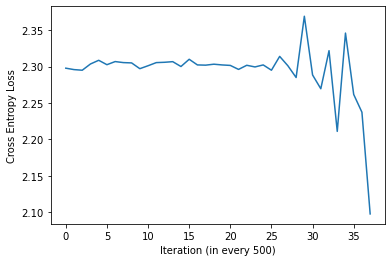

In [ ]:
# import matplotlib
# import matplotlib.pyplot as plt

# print (iteration_loss)
# plt.plot(iteration_loss)
# plt.ylabel('Cross Entropy Loss')
# plt.xlabel('Iteration (in every 500)')
# plt.show()

In [ ]:
# save_path = '/content/drive/My Drive/soft coding lab/assignment 2/'
# save_model = True

# if save_model is True:
#     # Saves only parameters
#     # weights & biases
#     torch.save(model.state_dict(), save_path + 'Assignment2_model_exp1.pkl') 

In [ ]:
# load_model = True

# if load_model is True:
#     model.load_state_dict(torch.load(save_path + 'Assignment2_model_exp1.pkl'))
#     print('Trained Model Loaded')

Trained Model Loaded


In [ ]:
# print(model)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=32400, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)


#**Dataset 2**

In [ ]:
dataset2_train = pd.read_csv(second_dataset_directory+'verification_train.csv')
dataset2_test = pd.read_csv(second_dataset_directory+'verification_test.csv')
print(dataset2_train)

       label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0          2       0       0       0  ...         0         0         0         0
1          9       0       0       0  ...         0         0         0         0
2          6       0       0       0  ...         0         0         0         0
3          0       0       0       0  ...         0         0         0         0
4          3       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
59995      9       0       0       0  ...         0         0         0         0
59996      1       0       0       0  ...         0         0         0         0
59997      8       0       0       0  ...         0         0         0         0
59998      8       0       0       0  ...         0         0         0         0
59999      7       0       0       0  ...         0         0         0         0

[60000 rows x 7

In [ ]:
print(dataset2_test)

      label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0         0       0       0       0  ...         0         0         0         0
1         1       0       0       0  ...         0         0         0         0
2         2       0       0       0  ...        31         0         0         0
3         2       0       0       0  ...       222        56         0         0
4         3       0       0       0  ...         0         0         0         0
...     ...     ...     ...     ...  ...       ...       ...       ...       ...
9995      0       0       0       0  ...         1         0         0         0
9996      6       0       0       0  ...        28         0         0         0
9997      8       0       0       0  ...        42         0         1         0
9998      8       0       1       3  ...         0         0         0         0
9999      1       0       0       0  ...         0         0         0         0

[10000 rows x 785 columns]


In [ ]:
dataset2_train_x = dataset2_train.iloc[:,1:785]
dataset2_train_y = dataset2_train.iloc[:,0]

dataset2_test_x = dataset2_test.iloc[:,1:785]
dataset2_test_y = dataset2_test.iloc[:,0]

In [ ]:
print(dataset2_train_x)

       pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       1  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
59995       0       0       0       0  ...         0         0         0         0
59996       0       0       0       0  ...         0         0         0         0
59997       0       0       0       0  ...         0         0         0         0
59998       0       0       0       0  ...         0         0         0         0
59999       0       0       0       0  ...         0         0         0         0

[60

In [ ]:
print(dataset2_train_y)

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64


In [ ]:
dataset2_train_x = np.asarray(dataset2_train_x)
dataset2_test_x = np.asarray(dataset2_test_x)

In [ ]:
width = 180
height = 180
dim = (width, height)
ind1 = 0
ind2 = 0
Final_dataset2_train = [] 
Final_dataset2_test = []

for i in dataset2_train_x:
  temp = i.reshape((28,28)).astype('float32')
  temp = cv2.resize(temp, dim, interpolation = cv2.INTER_AREA)
  temp = cv2.normalize(temp, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  temp = torch.tensor(temp)
  label = dataset2_train_y[ind1]
  temp = (temp,label)
  Final_dataset2_train.append(temp)
  ind1 = ind1 + 1

for i in dataset2_test_x:
  temp = i.reshape((28,28)).astype('float32')
  temp = cv2.resize(temp, dim, interpolation = cv2.INTER_AREA)
  temp = cv2.normalize(temp, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  temp = torch.tensor(temp)
  label = dataset2_test_y[ind2]
  temp = (temp,label)
  Final_dataset2_test.append(temp)
  ind2 = ind2 + 1

In [ ]:
print(Final_dataset2_train[0])

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 2)


In [ ]:
print(Final_dataset2_test[0])

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 0)


In [ ]:
batch_size = 20
train_loader = torch.utils.data.DataLoader(dataset=Final_dataset2_train, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=Final_dataset2_test, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

In [ ]:
num_epochs = num_iters / (len(Final_dataset2_train) / batch_size)
num_epochs = int(num_epochs)

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=32400, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 180*180).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 180*180).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.268378496170044. Accuracy: 47.44
Iteration: 1000. Loss: 1.2685235738754272. Accuracy: 53.04
Iteration: 1500. Loss: 0.8256511688232422. Accuracy: 65.53
Iteration: 2000. Loss: 0.5228264927864075. Accuracy: 71.66
Iteration: 2500. Loss: 0.8100782632827759. Accuracy: 75.31
Iteration: 3000. Loss: 0.5623299479484558. Accuracy: 76.36
Iteration: 3500. Loss: 1.0542203187942505. Accuracy: 77.33
Iteration: 4000. Loss: 0.43914204835891724. Accuracy: 79.2
Iteration: 4500. Loss: 0.6113525629043579. Accuracy: 77.1
Iteration: 5000. Loss: 0.42135047912597656. Accuracy: 81.61
Iteration: 5500. Loss: 0.5948345065116882. Accuracy: 83.02
Iteration: 6000. Loss: 0.9145246744155884. Accuracy: 83.46
Iteration: 6500. Loss: 0.43560609221458435. Accuracy: 81.38
Iteration: 7000. Loss: 0.9428593516349792. Accuracy: 84.7
Iteration: 7500. Loss: 0.14533111453056335. Accuracy: 83.95
Iteration: 8000. Loss: 0.5626212358474731. Accuracy: 83.4
Iteration: 8500. Loss: 0.3475434184074402. Accuracy: 85.14

[2.268378496170044, 1.2685235738754272, 0.8256511688232422, 0.5228264927864075, 0.8100782632827759, 0.5623299479484558, 1.0542203187942505, 0.43914204835891724, 0.6113525629043579, 0.42135047912597656, 0.5948345065116882, 0.9145246744155884, 0.43560609221458435, 0.9428593516349792, 0.14533111453056335, 0.5626212358474731, 0.3475434184074402, 0.2570841908454895, 0.5428808927536011, 0.4857111871242523, 0.36240309476852417, 0.6965721249580383, 0.5188680291175842, 0.18222279846668243, 0.11352352797985077, 0.550051212310791, 0.46253347396850586, 0.3493184745311737, 0.12782825529575348, 0.2541627287864685, 0.19048184156417847, 0.23984766006469727, 0.1595383584499359, 0.16087977588176727, 0.11018602550029755, 0.1350238174200058]


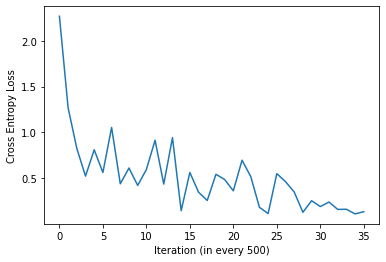

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()